# Iris Dataset

In [29]:
from sklearn.datasets import load_iris

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [32]:
iris = pd.DataFrame(data=data.data, columns=data.feature_names)
iris['species'] = data.target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [33]:
iris.rename({"sepal length (cm)": "sepal_length", "sepal width (cm)": "sepal_width", "petal length (cm)": "petal_length", "petal width (cm)": "petal_width"}, axis=1, inplace=True)
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Data pre-processing and EDA

In [34]:
iris['species_name'] = iris.species.map(lambda x: data.target_names[x])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Checking missing values

In [35]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_name    0
dtype: int64

1. Basic statistical analysis

In [36]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
 5   species_name  150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [37]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


- petal_length has the greatest standard deviation. Compared to other features, petal_width seems to have a narrower range of values. It 
would be better to perform regularization after checking the model performance due to the scale differences between features

2. Correlation analysis

In [38]:
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


- The correlation coefficient of petal_length and petal_width is 0.962865, which is extremely high. Since highly correlated features may induce 
multicollinearity problems, it is recommended to select one of the two variables to use.

3. Aggregation analysis

In [39]:
iris.groupby('species_name').size()

species_name
setosa        50
versicolor    50
virginica     50
dtype: int64

- Number of data in each target was counted using the aggregation function ‘size,’ and it was confirmed that 50 data were equally found in 
each feature. Select between ‘size’ and ‘count’ depending on the purpose of the analysis. The ‘size’ counts the number of data, including 
missing values. On the other hand, the ‘count’ counts the number of data without missing values. In this case, there’s no difference using ‘size’ 
and ‘count’ because iris data does not have any missing values.

## Data Visualization

1. Boxplot

In [40]:
def boxplot_iris(feature_names, dataset):
    i = 1
    plt.figure(figsize=(11, 9))
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis('on')
        plt.tick_params(axis='both', left=True, top=False, right=False, bottom=True, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
        dataset[col].plot(kind='box', subplots=True, sharex=False)
        plt.title(col)
        i += 1
    plt.show()

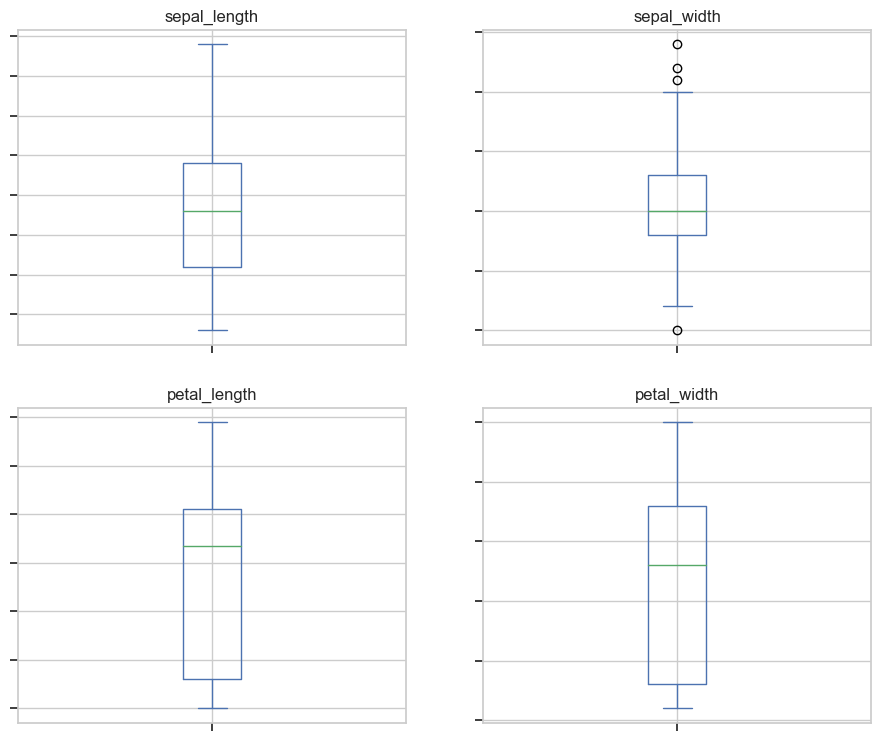

In [41]:
boxplot_iris(iris.columns[:-2], iris)

2. Histogram

In [42]:
def histogram_iris(feature_names, dataset):
    i = 1
    plt.figure(figsize=(11, 9))
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis('on')
        plt.tick_params(axis='both', left=True, top=False, right=False, bottom=True, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
        dataset[col].hist()
        plt.title(col)
        i += 1
    plt.show()

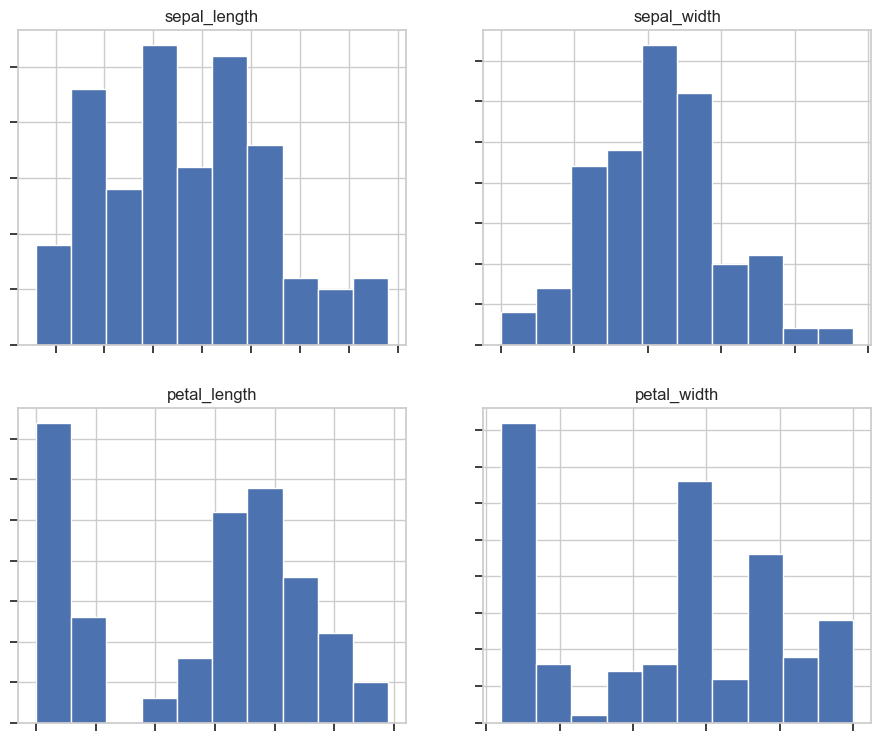

In [43]:
histogram_iris(iris.columns[:-2], iris)

The frequency of the median class interval is high for petal_width and becomes lower as it deviates far away from the center. In the box plot, the box length of the sepal_width is short because a lot of data was aggregated at the median. In the case of petal_length, the frequency of the median class interval is high, but there are a lot of data on the left class interval. In the box plot, the box of petal_length is long to the bottom because there were a lot of data in lower values.

3. Visualizing correlation

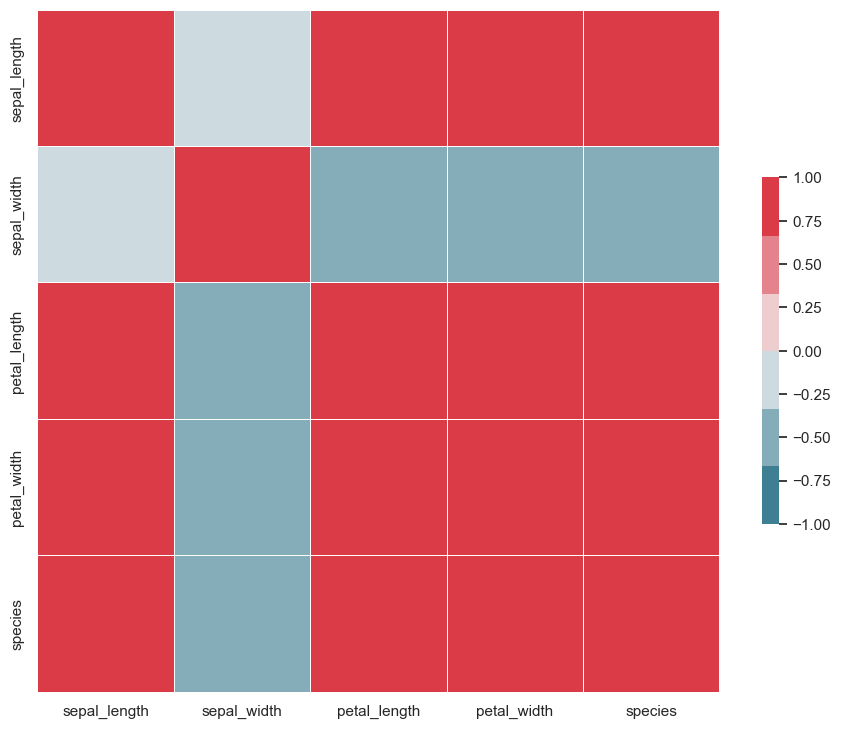

In [44]:
corr = iris.select_dtypes(include='number').corr()
cmap = sns.diverging_palette(220, 10)
plt.figure(figsize=(11, 9))
sns.heatmap(corr, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Visualizing the correlation between features and data distribution using pairplot

[]

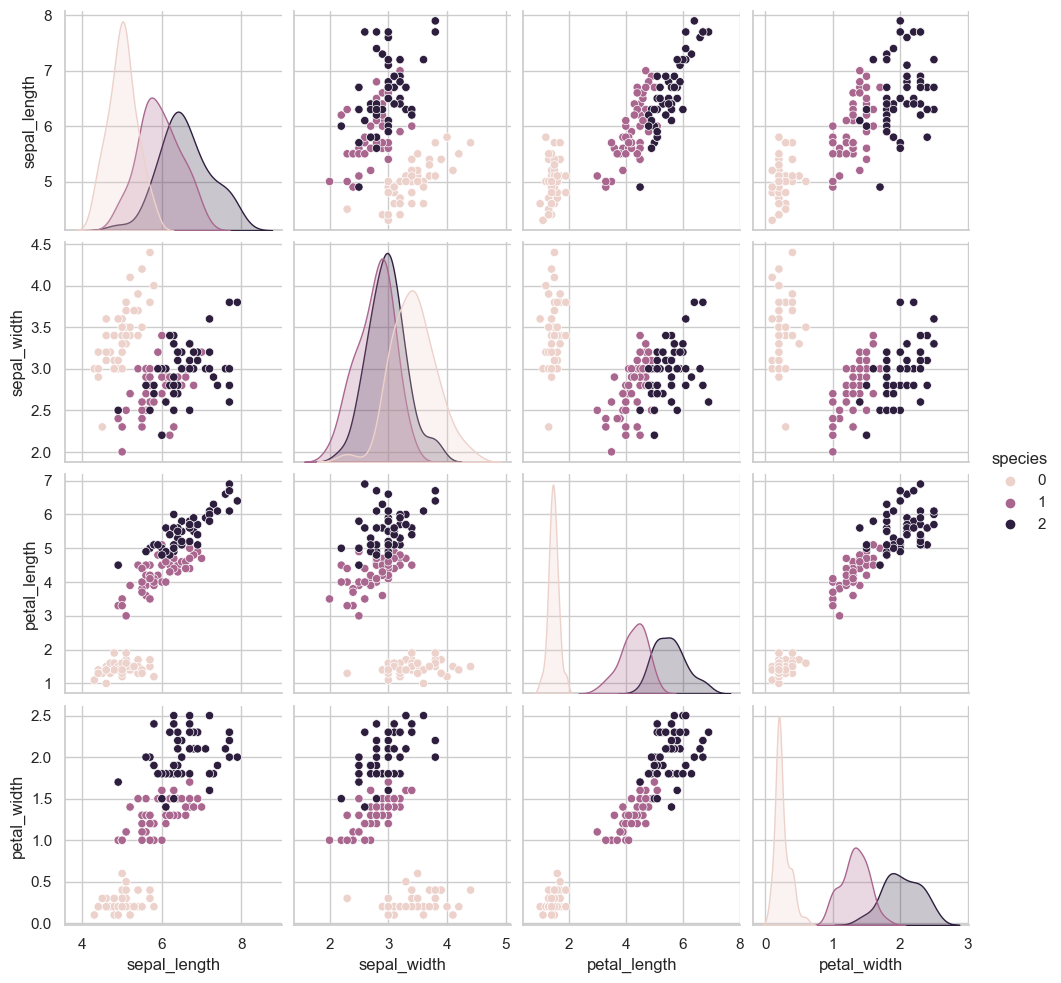

In [45]:
sns.pairplot(iris, hue='species')
plt.plot()

4. Visualizing the class ratio of the target

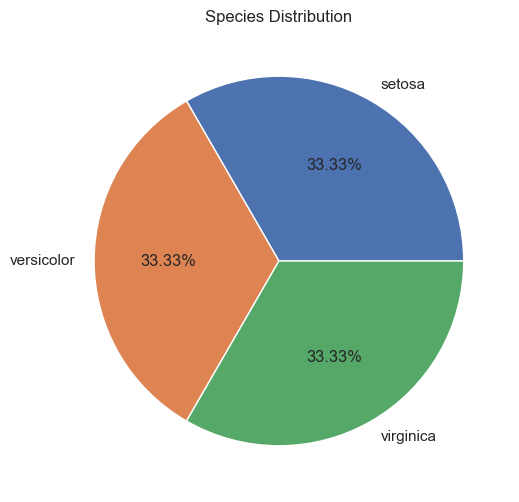

In [46]:
# Group the data by the 'species_name' column and count the occurrences
species_counts = iris['species_name'].value_counts()

# Get the labels and corresponding counts
labels = species_counts.index
counts = species_counts.values

# Create a pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
plt.pie(counts, labels=labels, autopct='%1.2f%%')

# Add a title
plt.title('Species Distribution')

# Display the chart
plt.show()


The data is evenly arranged in each class.

## Train-Test split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.iloc[:,-1], test_size=0.3, random_state=42)

## Classification algorithm

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

In [51]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
model.score(X_test, y_test)

1.0